# Model Building With SMOTE

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

## Importing the dataset

In [3]:
poll_df = pd.read_csv('air_pollution_gauss_cleaned.csv') # Loading normally or gaussian distributed data
poll_df.head()

,Date,State Name,New Covid Cases,Population Staying at Home,Population Not Staying at Home,Number of Trips,pm10_mean,pm25_mean,co_mean,no2_mean,o3_mean,so2_mean,press_mean,rh_mean,temp_mean,wind_mean,AQI,Category
0,2020-01-01,Alabama,0.0,859.830216,1710.371305,3245.716331,3.535534,2.868094,0.543782,4.046470,0.033676,0.951766,3.799426e+36,223.283219,48.435555,92.363889,6.055301,Good
1,2020-01-01,California,0.0,1161.114551,2234.236335,4629.817437,4.197069,3.454464,0.639386,3.185928,0.022262,0.755213,2.689899e+36,318.449161,49.710225,93.809963,7.440329,Moderate
2,2020-01-01,Colorado,0.0,766.009791,1408.948899,2977.793038,3.201562,2.187598,0.570414,3.518695,0.038290,1.050116,5.285798e+35,327.386469,31.375000,113.998580,5.524357,Good
3,2020-01-01,Connecticut,0.0,499.490741,975.321998,1965.252528,2.280351,1.762456,0.439804,2.559934,0.024059,0.325265,3.405333e+36,195.157135,37.482143,135.210606,4.708149,Good
4,2020-01-01,Florida,0.0,1160.936691,2275.216913,4589.595448,4.427189,3.655956,0.556034,3.329852,0.030658,1.010231,4.687015e+36,343.042315,61.408333,102.174306,6.786109,Good


## Applying SMOTE

In [4]:
from imblearn.over_sampling import SMOTE

X = poll_df[['New Covid Cases', 'Population Staying at Home',
       'Population Not Staying at Home', 'Number of Trips', 'pm10_mean',
       'pm25_mean', 'co_mean', 'no2_mean', 'o3_mean', 'so2_mean', 'press_mean',
       'rh_mean', 'temp_mean', 'wind_mean','AQI']].values
y = poll_df['Category'].values

smote =SMOTE(random_state=42)
X_sm,y_sm=smote.fit_resample(X,y)

In [5]:
poll_df['Category'].value_counts()

Good        20157
Moderate     2569
Name: Category, dtype: int64

In [6]:
pd.Series(y_sm).value_counts()

Good        20157
Moderate    20157
dtype: int64

## Selecting Dependent and Independent Features

In [7]:
X = X_sm[:,:-1]
y = X_sm[:,-1]

## Normalization and Scaling of Data

In [8]:
sc_X = StandardScaler()
sc_y = StandardScaler()

In [9]:
X = sc_X.fit_transform(X)

## Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Regression Models On Balanced Dataset

### Multilinear Regression

#### Training the Multiple Linear Regression Model

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

#### Predicting the Test set results

In [12]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[6.92 7.2 ]
 [6.15 5.85]
 [8.16 7.48]
 ...
 [6.57 6.41]
 [6.94 7.45]
 [6.27 6.59]]


#### Evaluating the Model Performance

In [13]:
from sklearn.metrics import r2_score

print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R squared value: ",r2_score(y_test, y_pred))

MAE: 0.3487668072846688
MSE: 0.20170041134115715
RMSE: 0.4491106894086993
R squared value:  0.7974774720514967


### Multiple linear Regression K fold cross validation and Grid search

#### Training

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#### 3 fold cross validation

In [15]:
cv=cross_validate(regressor, X, y, cv=3)

In [16]:
print('3 folds accuracy:',cv['test_score']*100)
print('mean accuracy of 3 folds:',cv['test_score'].mean()*100,'%')

3 folds accuracy: [  44.88   79.53 -236.47]
mean accuracy of 3 folds: -37.35043891067789 %


#### Grid Search

In [17]:
param_grid={'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

In [18]:
grid_search = GridSearchCV(estimator = regressor, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [19]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


GridSearchCV(cv=3, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             verbose=2)

#### Prediction

In [20]:
from sklearn.metrics import r2_score
y_pred = grid_search.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R squared value: ",r2_score(y_test, y_pred))

MAE: 0.3487668072846688
MSE: 0.20170041134115715
RMSE: 0.4491106894086993
R squared value:  0.7974774720514967


#### Plotting Results

Text(0, 0.5, 'Predicted Values')

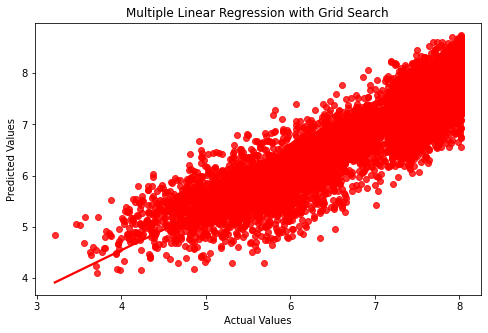

In [23]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');
plt.title('Multiple Linear Regression with Grid Search')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')